In [1]:
import sys
sys.path.append("/home/macbuse/miniconda3/lib/python3.11/site-packages")

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as stats

/tmp/ipykernel_11573/1822434047.py:7: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.stats as stats


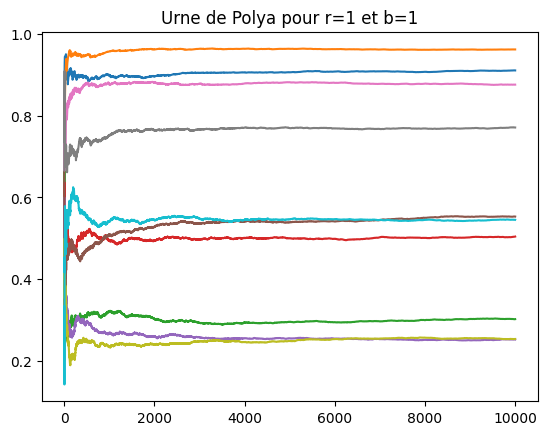

In [2]:
## Exo 1
r = 1
b = 1
N = 10000
Nsim = 10

for i in range(0, Nsim):
    urne = np.concatenate((np.ones(r),np.zeros(b)))
    X = np.zeros(N)
    for i in range(0,N):
        I = np.array([npr.choice(urne)])
        urne = np.concatenate((urne,I))
        X[i] = np.mean(urne)
    plt.plot(np.arange(1,N+1),X)
    
plt.title(f'Urne de Polya pour r={r} et b={b}')
plt.show()
# Il semble bien que la proportion converge, mais vers une limite aléatoire


## alternative to calculating a rolling average in the loop

This  uses:
- fixed length arrays to avoid **append**
- vectorisation to calculate the proportions quicker <br>
  ```proportions_rouge = np.cumsum(urne) / np.arange(1, len(urne) + 1)```


In [21]:
# should use @jit or @njit 
# with numba (see below)

def get_sim_urne(r=1, b=1, N=1000):
    # use a fixed length array of integers
    urne = np.zeros(r + b + N, dtype=np.int64)
    urne[:r] = 1 # Initialisation rouges
    
    # Boucle optimisée pour Numba
    for i in range(r + b, r + b + N):
        # npr.randint pour la vitesse maximale avec numba
        # avoids npr.choice 
        idx = npr.randint(0, i)
        urne[i] = urne[idx]      
    return urne
    

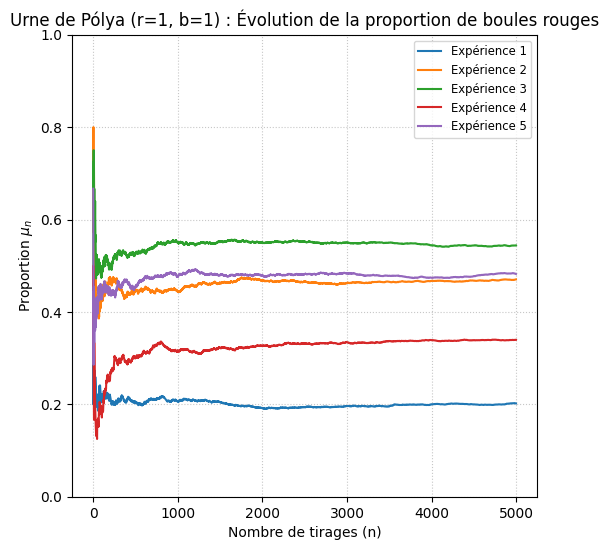

In [34]:
Nsim = 5
r = b = 1

# Création de la figure et de l'axe de manière sécurisée
fig, ax = plt.subplots(figsize=(6, 6))

for j in range(Nsim):
    urne  = get_sim_urne(r=r, b=b, N=5000)
    #calculate proportions
    proportions_rouge = np.cumsum(urne) / np.arange(1, len(urne) + 1)
    #ignore filling initial urne
    Y = proportions_rouge[r+b:]
    ax.plot(np.arange(0, len(Y)), Y, 
            label=f'Expérience {j+1}')


ax.set_title(f'Urne de Pólya (r={r}, b={b}) : Évolution de la proportion de boules rouges')
ax.set_xlabel('Nombre de tirages (n)')
ax.set_ylabel('Proportion $\mu_n$')
ax.set_ylim(0, 1) # La proportion est toujours entre 0 et 1
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(loc='upper right', fontsize='small')

plt.show()



Il semble bien que la proportion converge, mais vers une limite aléatoire

---


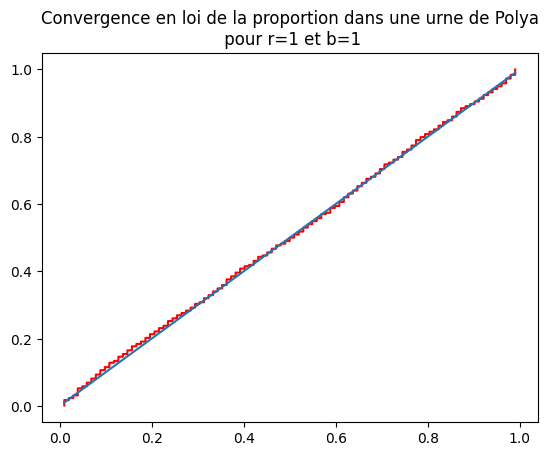

In [20]:

Nsim = 1000
N = 100
r = b = 1
Y = np.zeros(Nsim)

for i in range(0,Nsim):
    urne = np.concatenate((np.ones(r),np.zeros(b)))
    for j in range(0,N):
        I = np.array([npr.choice(urne)])
        # I 
        urne = np.concatenate((urne,I))
    Y[i] = np.mean(urne)
    
Ys = sorted(Y)
x=np.linspace(min(Y),max(Y),num=100)

plt.step(Ys,np.arange(1,Nsim+1)/Nsim,
         color='r',where='post')
plt.plot(x, stats.beta(r,b).cdf(x))
plt.title(f'Convergence en loi de la proportion dans une urne de Polya\n pour r={r} et b={b}')
plt.show()


In [4]:
# reinstall numba using conda

from numba import jit


# Compile with the jit

- ... before doing the simulation
- this means you can work with much bigger N without a wait


In [43]:
@jit

def get_sim_urne(r=1, b=1, N=1000):
    # use a fixed length array of integers
    urne = np.zeros(r + b + N, dtype=np.int64)
    urne[:r] = 1 # Initialisation rouges
    
    # Boucle optimisée pour Numba
    for i in range(r + b, r + b + N):
        # npr.randint pour la vitesse maximale
        # avoids npr.choice 
        idx = npr.randint(0, i)
        urne[i] = urne[idx]      
    return urne
    

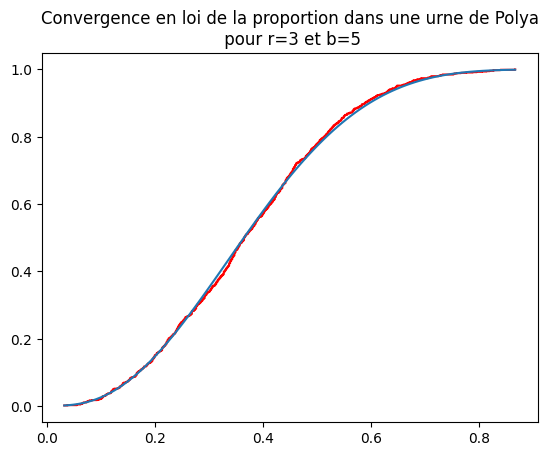

In [44]:
Nsim = 1000
Y = np.zeros(Nsim)
r = 3
b = 5

for i in range(0,Nsim):
    # this is to disable the code in the loop
    continue
    urne = get_sim_urne(r=r,b=b,N=1000)
    Y[i] = np.mean(urne)

# technically you can do this as a list comprehension now
# so you don't need to initialise Y 
Y = [np.mean(get_sim_urne(r=r,b=b,N=500)) for _ in range(0,Nsim) ]

Ys = sorted(Y)

# same comment about min and max = Ys[0], Ys[-1]
Xs =np.linspace(min(Y),max(Y),num=100)

#why not np.linspace(0,1,Nsim) ?
plt.step(Ys,np.arange(1,Nsim+1)/Nsim,
         color='r',where='post')
plt.plot(Xs, stats.beta(r,b).cdf(Xs))
plt.title(f'Convergence en loi de la proportion dans une urne de Polya\n pour r={r} et b={b}')
plt.show()

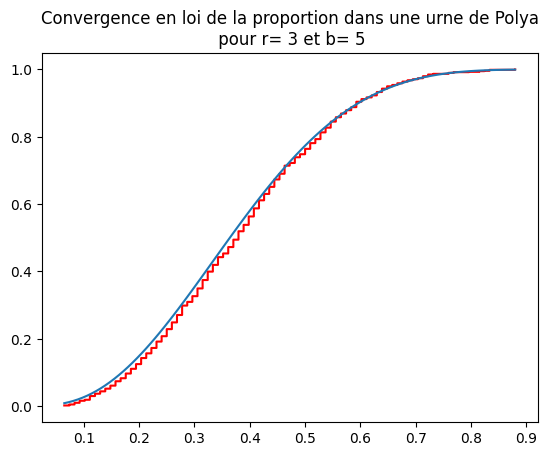

In [38]:
#
Nsim = 1000
N = 100
r = 3
b = 5
Y = np.zeros(Nsim)

for i in range(0,Nsim):
    urne=np.concatenate((np.ones(r),np.zeros(b)))
    for j in range(0,N):
        I=np.array([npr.choice(urne)])
        urne=np.concatenate((urne,I))
    Y[i]=np.mean(urne)
    
Ys=sorted(Y)
x=np.linspace(min(Y),max(Y),num=100)
plt.figure()
plt.step(Ys,np.arange(1,Nsim+1)/Nsim,color='r',where='post')
plt.plot(x,stats.beta(r,b).cdf(x))
plt.title('Convergence en loi de la proportion dans une urne de Polya\n pour r= '+str(r) + ' et b= ' + str(b))
plt.show()